STEP 1 : DEFINE BUSINESS CASE

**Problem Statement:**  
- Prepare a complete data analysis report.  
- Create a machine learning model to predict various classes of skin diseases.  
- Provide suggestions to doctors for early disease identification.  

**Business Objective:**  

The goal is to improve diagnostic accuracy and speed for erythemato-squamous diseases using machine learning, reducing reliance on biopsies and facilitating early treatment.  

**Problem Description:**  

The dataset includes 34 attributes, with 33 clinical and histopathological features, plus patient age. Diagnosing skin diseases is challenging due to overlapping symptoms and evolving disease stages. The project involves analyzing this data, building models, and identifying the most accurate approach to help doctors diagnose conditions like psoriasis, dermatitis, and lichen planus more effectively.  

 


STEP 2 : **IMPORT LIBRARIES**

In [ ]:
#!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

STEP 3 : **LOAD THE DATA**

In [2]:
data=pd.read_csv('dermatology.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'dermatology.csv'

In [ ]:
data

STEP 4  : **BASIC CHECKS**

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.info()  ##NO MISSING VALUE

In [ ]:
#UNIQUE CLASS VALUE
data["class"].unique()

In [9]:
data["class"].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

In [10]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [11]:
data.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  focal_hypergranulosis  \
count         366.000000  ...             366.000000   
mean            0.519126  ...               0.393443   
std             0.905639  ...               0.849406   
min             0.000000  ...               0.000000   
25%             0.000000  ...               0.000000   
50%             0.000000  ...               0.000000   
75%             1.000000  ...               0.000000   
max             3.000000  ...               3.000000   

       disappearance_of_the_granular_layer  \
count                           366.000000   
mean                              0.464481   
std                               0.864899   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis  \
count                               366.000000  366.000000   
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug  \
count                     366.000000            366.000000   
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
count                    366.000000                           366.000000   
mean                       0.114754                             1.8661

In [12]:
data.dtypes

erythema                                     int64
scaling                                      int64
definite_borders                             int64
itching                                      int64
koebner_phenomenon                           int64
polygonal_papules                            int64
follicular_papules                           int64
oral_mucosal_involvement                     int64
knee_and_elbow_involvement                   int64
scalp_involvement                            int64
family_history                               int64
melanin_incontinence                         int64
eosinophils_in_the_infiltrate                int64
PNL_infiltrate                               int64
fibrosis_of_the_papillary_dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing_of_the_rete_ridges    

In [13]:
data.isnull()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0       False    False             False    False               False   
1       False    False             False    False               False   
2       False    False             False    False               False   
3       False    False             False    False               False   
4       False    False             False    False               False   
..        ...      ...               ...      ...                 ...   
361     False    False             False    False               False   
362     False    False             False    False               False   
363     False    False             False    False               False   
364     False    False             False    False               False   
365     False    False             False    False               False   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                False               False                     False   
1                False               False                     False   
2                False               False                     False   
3                False               False                     False   
4                False               False                     False   
..                 ...                 ...                       ...   
361              False               False                     False   
362              False               False                     False   
363              False               False                     False   
364              False               False                     False   
365              False               False                     False   

     knee_and_elbow_involvement  scalp_involvement  ...  \
0                         False              False  ...   
1                         False              False  ...   
2                         False              False  ...   
3                         False              False  ...   
4                         False              False  ...   
..                          ...                ...  ...   
361                       False              False  ...   
362                       False              False  ...   
363                       False              False  ...   
364                       False              False  ...   
365                       False              False  ...   

     disappearance_of_the_granular_layer  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   
..                                   ...   
361                                False   
362                                False   
363                                False   
364                                False   
365                                False   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                      False       False   
1                                      False       False   
2                                      False       False   
3                                      False       False   
4                                      False       False   
..                                       ...         ...   
361                                    False       False   
362                                    False       False   
363                                    False       False   
364                                    False       False   
365                                    False       False   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                            False                 False   
1                            False                 False   
2                            False                 False   
3                            False                 False   
4   

STEP 5 : **DOMAIN ANALYSIS AND EDA**

Domain: Healthcare

Attributes: 34 (33 clinical and histopathological features, 1 age attribute)

Target Diseases: Psoriasis, Seborrheic Dermatitis, Lichen Planus, Pityriasis Rosea, Chronic Dermatitis, Pityriasis Rubra Pilaris

STEP 6: **EXPLORATORY DATA ANALYSIS**

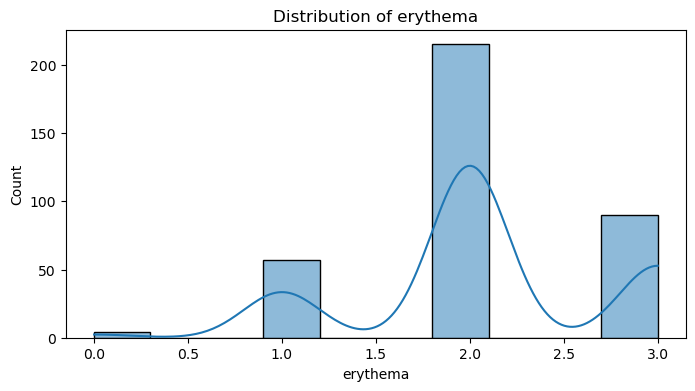

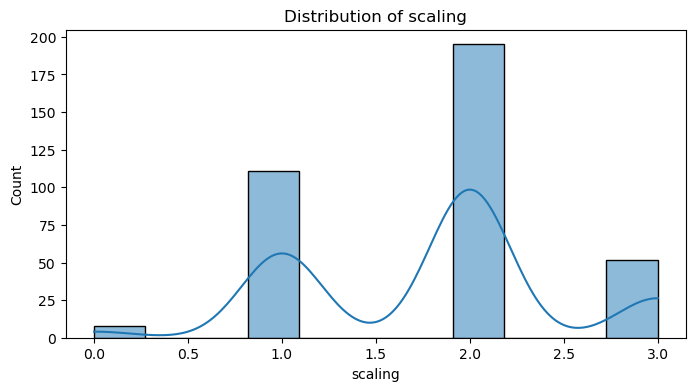

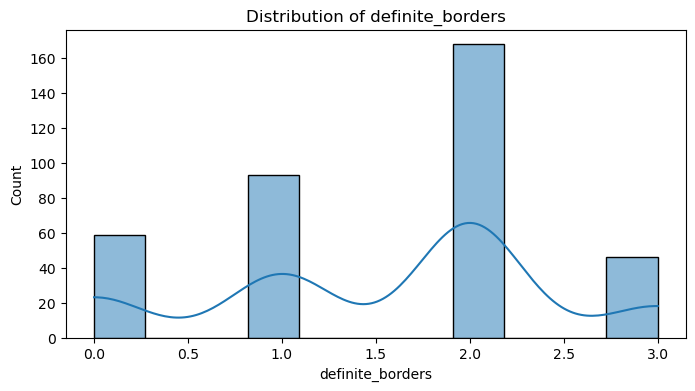

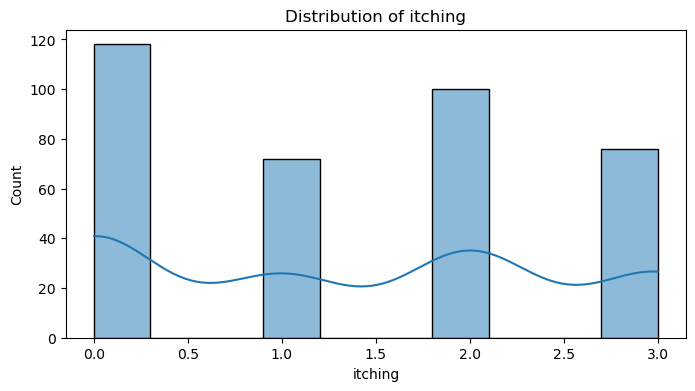

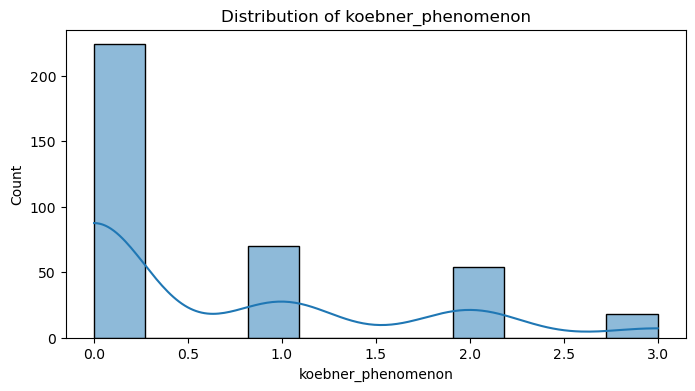

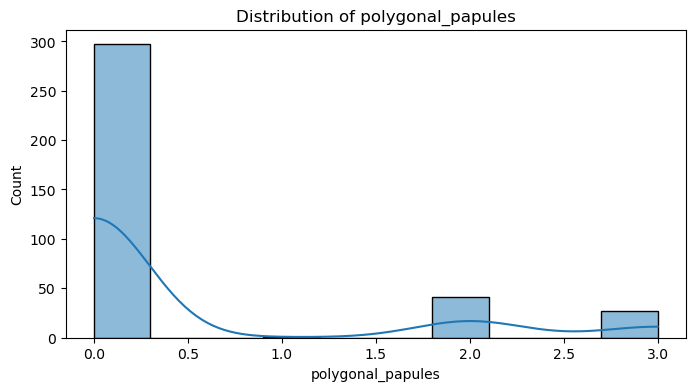

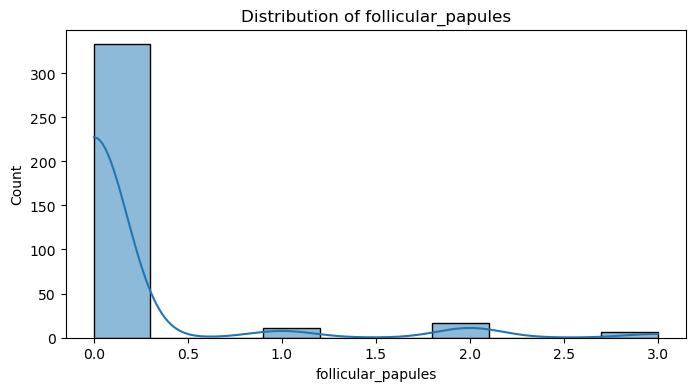

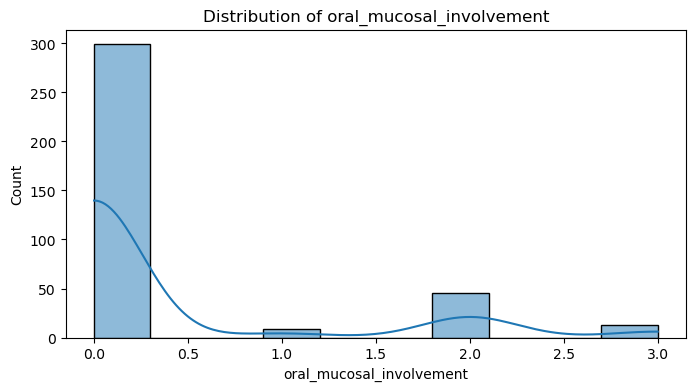

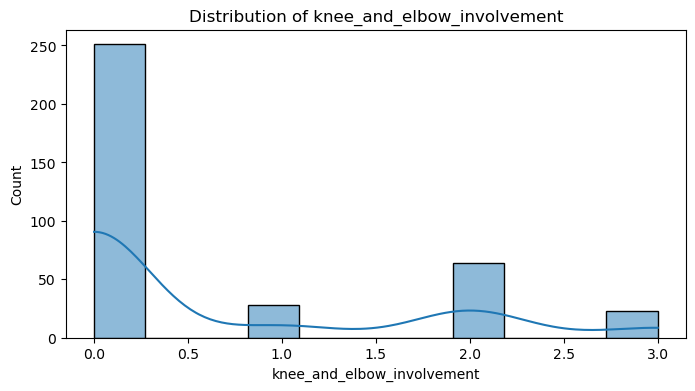

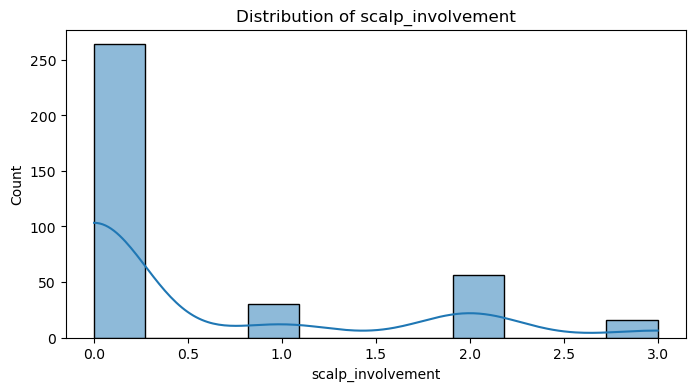

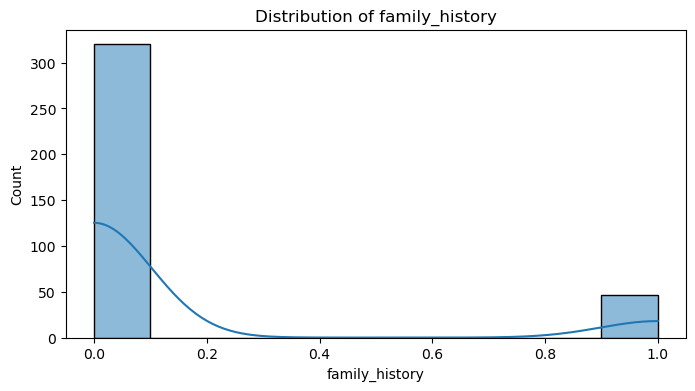

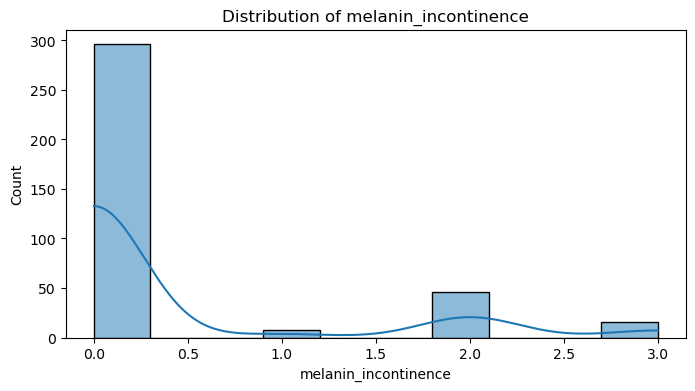

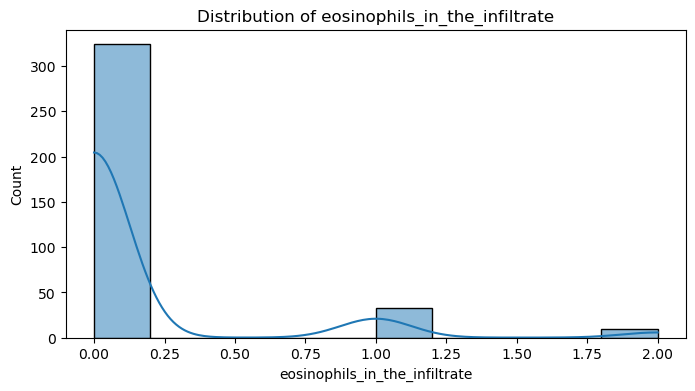

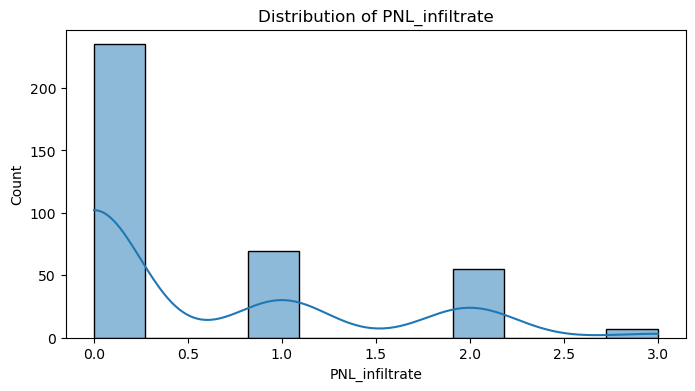

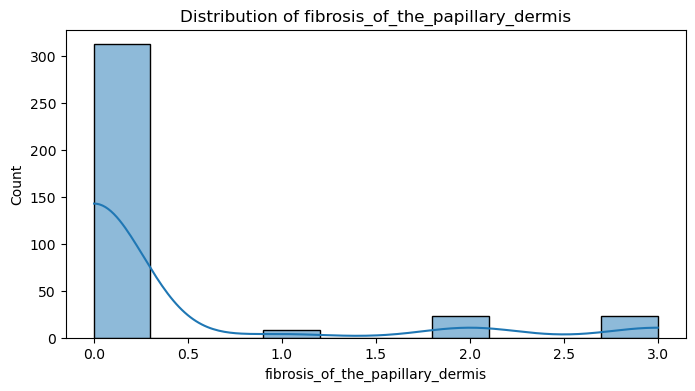

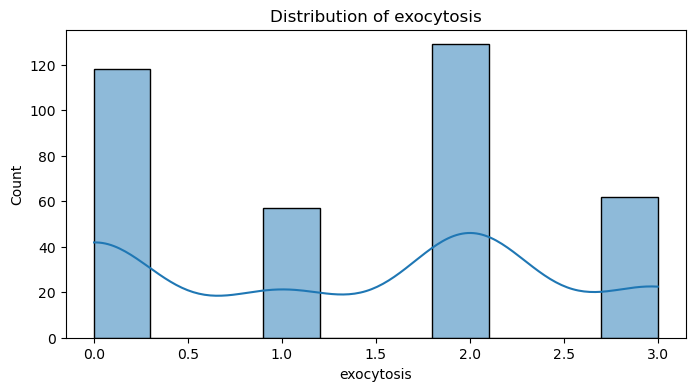

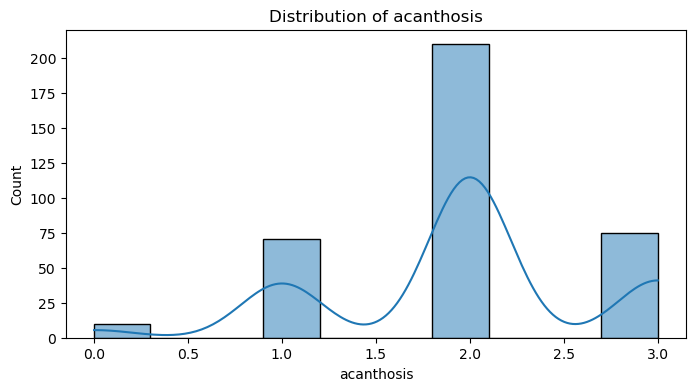

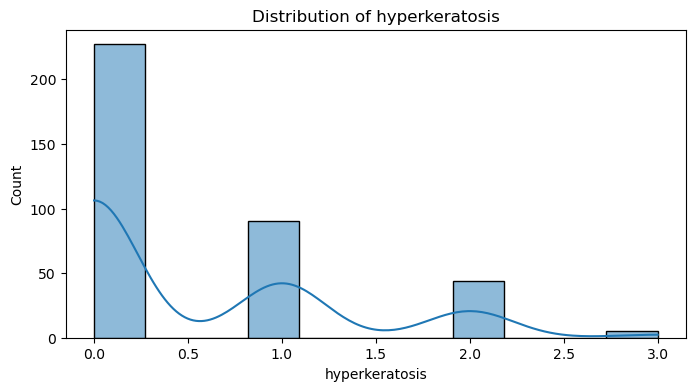

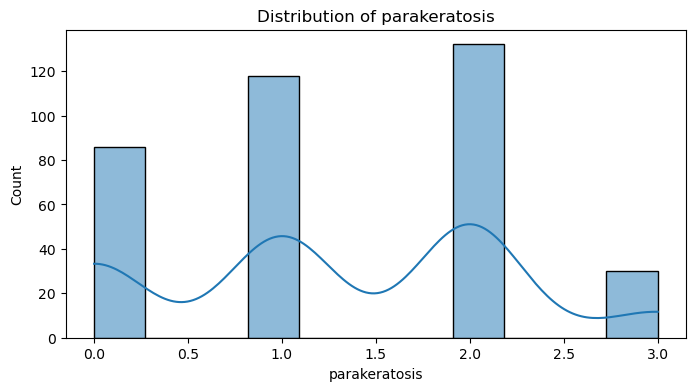

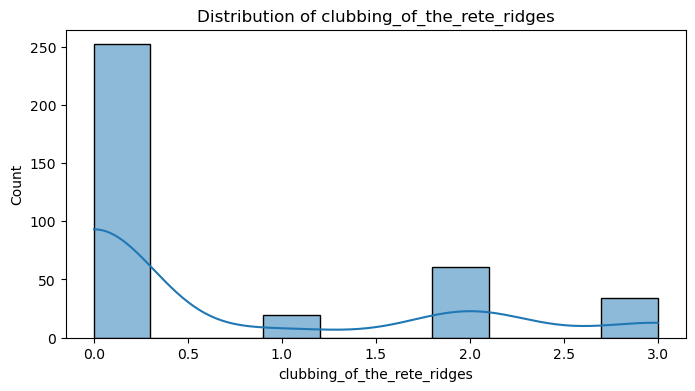

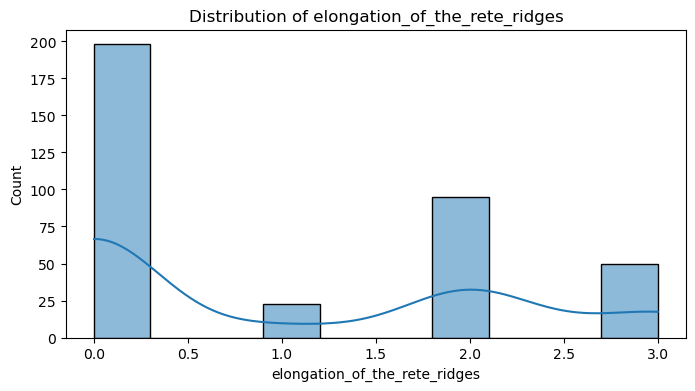

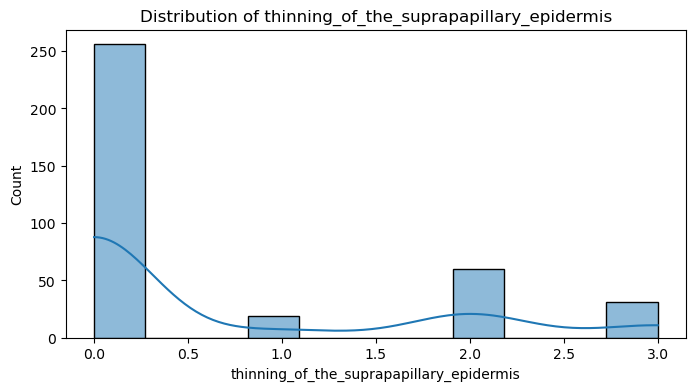

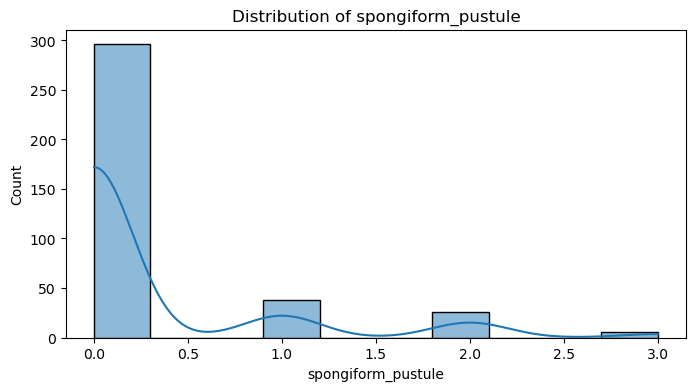

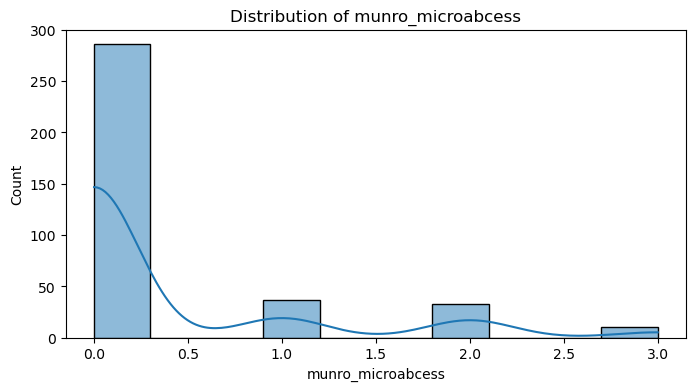

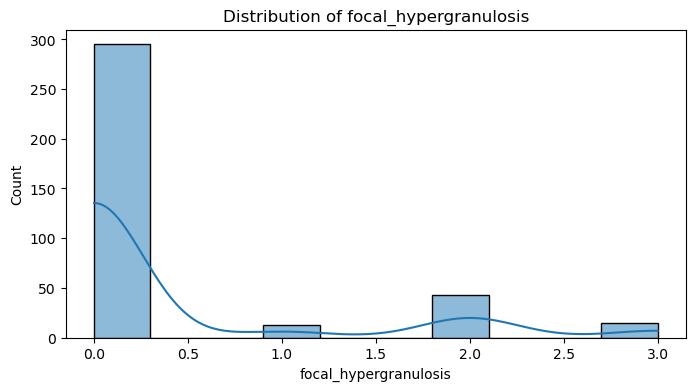

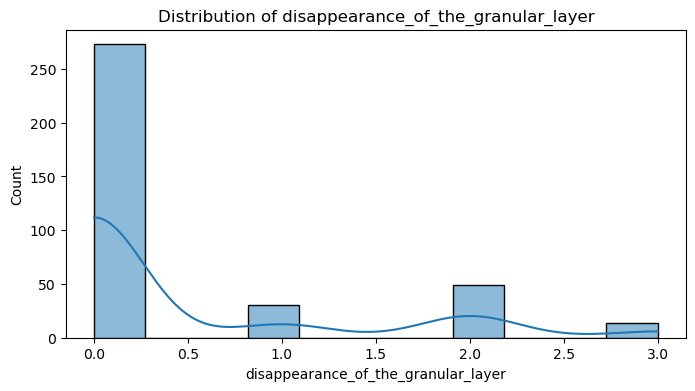

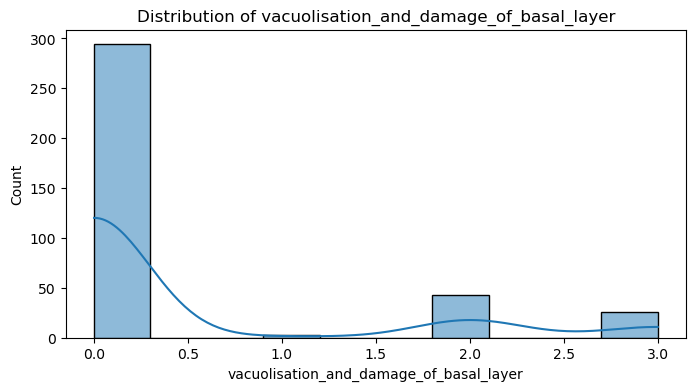

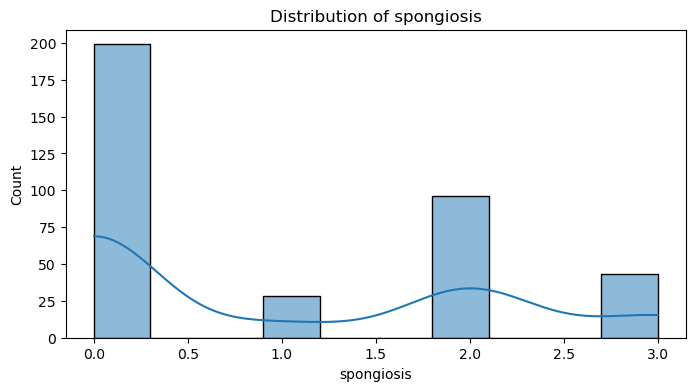

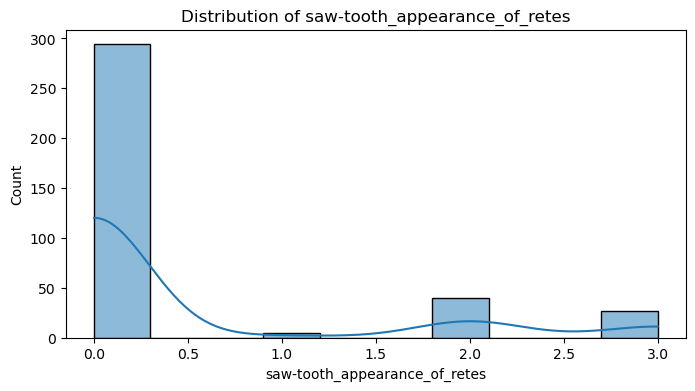

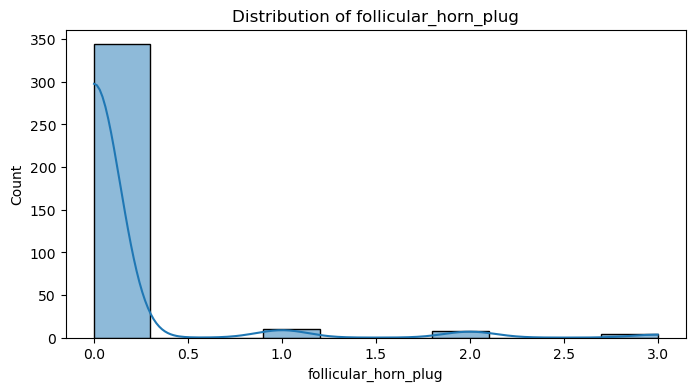

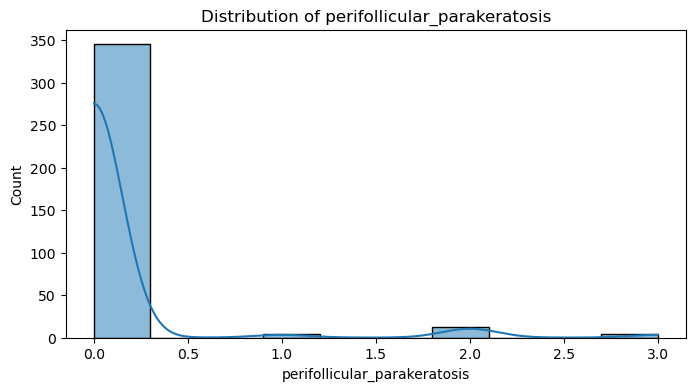

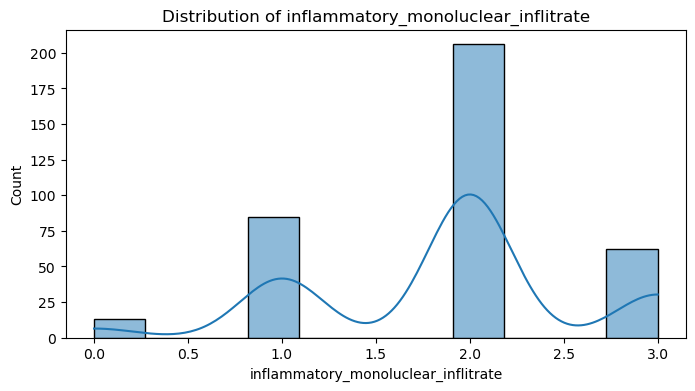

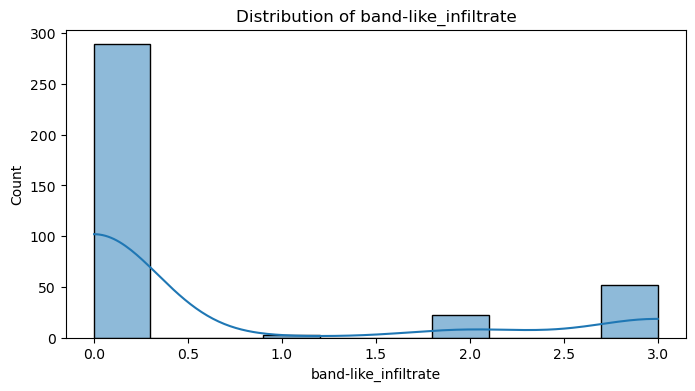

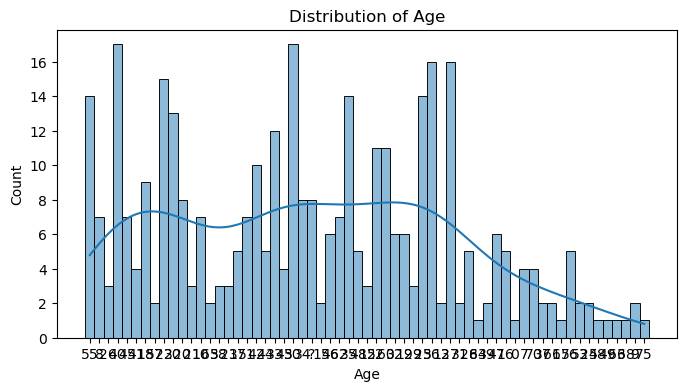

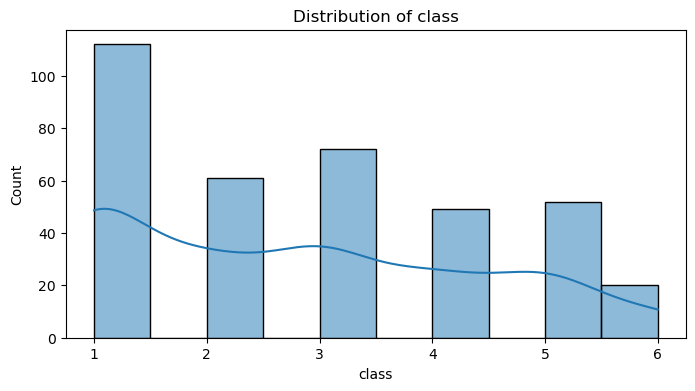

In [14]:
##UNIVARIATE ANALYSIS
for col in data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [15]:
# Bivariate and Multivariate Analysis
sns.pairplot(data, hue='class')
plt.show()

In [17]:
#plt.figure(figsize=(20,25),facecolor='white')
#sns.pairplot(data)  
#plt.show()

STEP 6 : **DATA PREPROCESSING**

In [18]:
# Drop rows with NaNs
data.dropna(inplace=True)  

In [19]:
#ValueError because the dataset contains missing or invalid values represented as '?'.
data.replace('?', pd.NA, inplace=True)   

In [20]:
# Convert all columns to numeric (coerce errors)
data = data.apply(pd.to_numeric, errors='coerce')

In [21]:
##HANDLING MISSING VALUE

In [22]:
# Fill missing values with median (or use another strategy)
data.fillna(data.median(), inplace=True)

In [23]:
data.Age=data['Age'].astype('int64')

In [24]:
##REMOVING DUPLICATES
data.drop_duplicates(inplace=True)

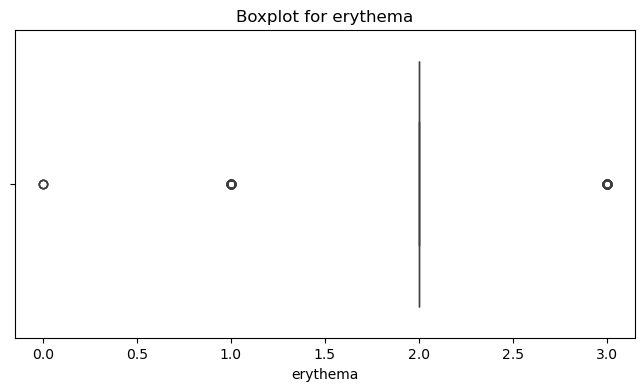

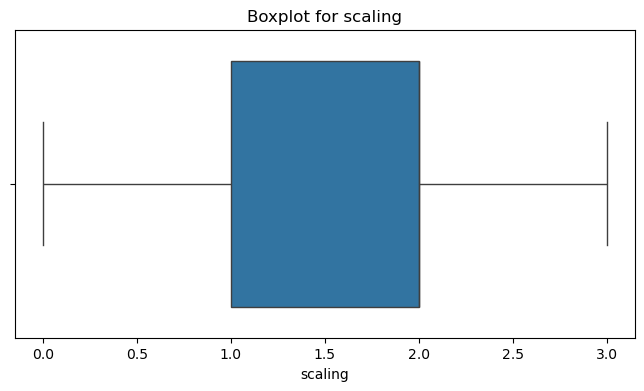

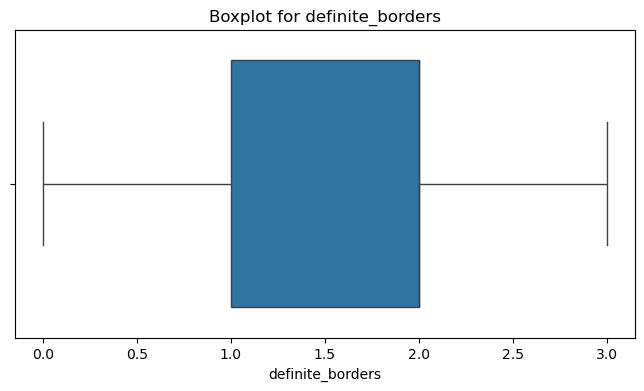

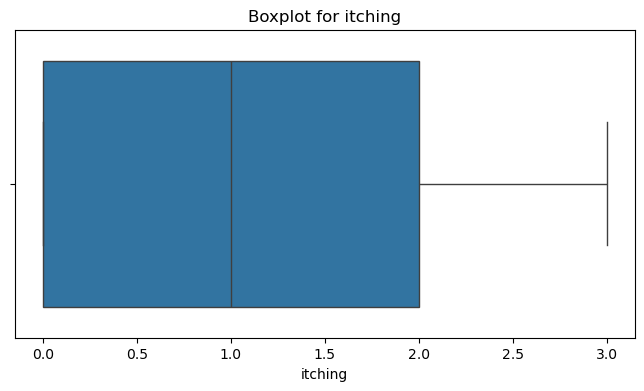

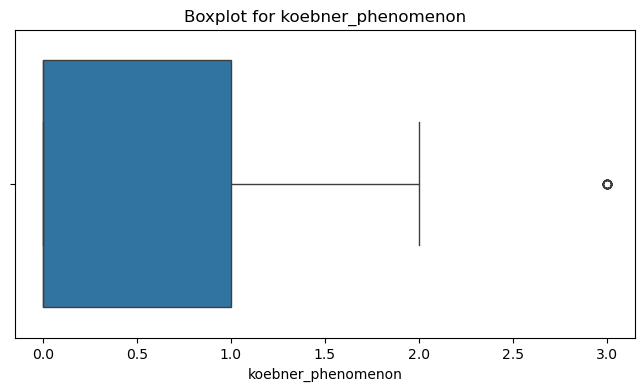

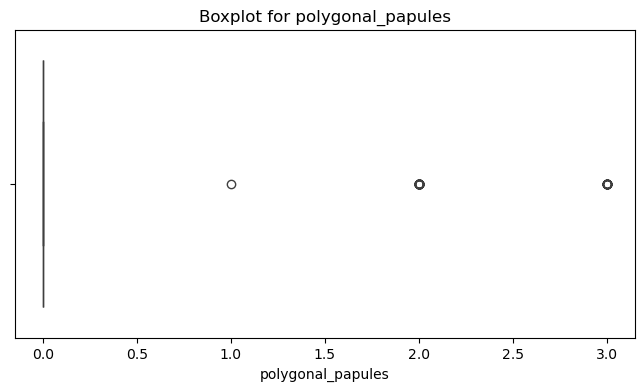

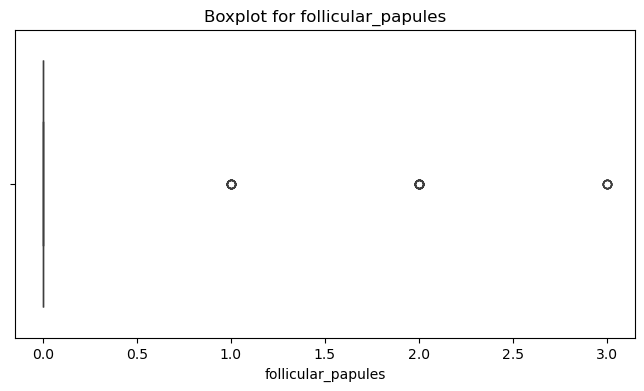

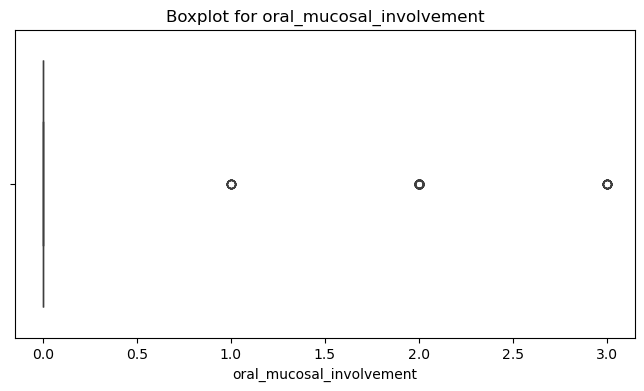

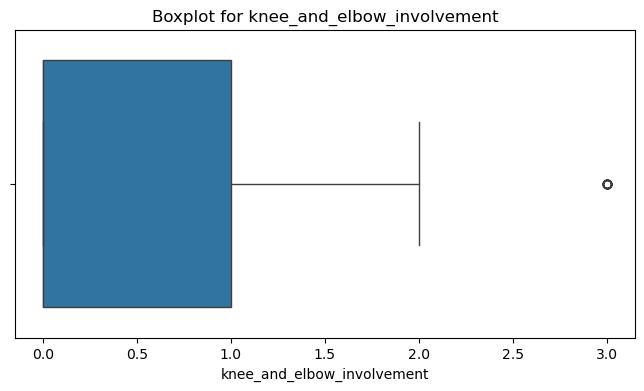

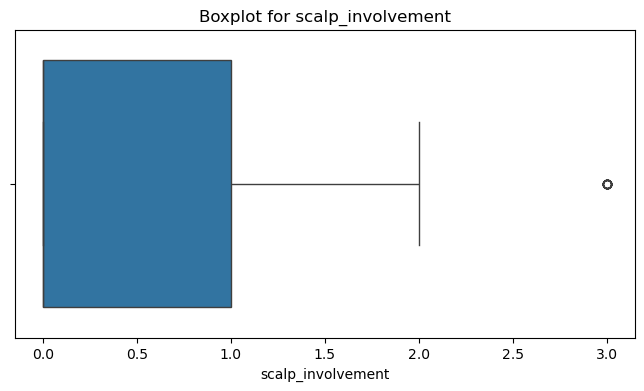

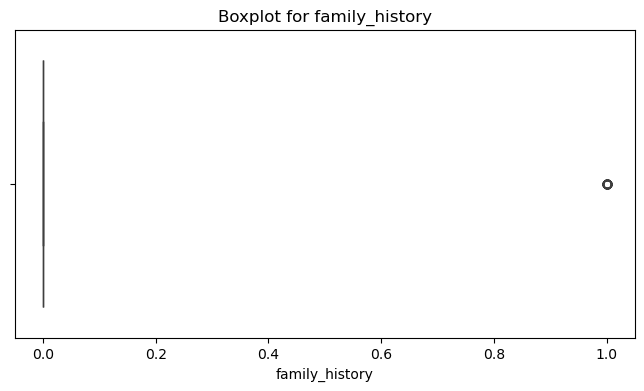

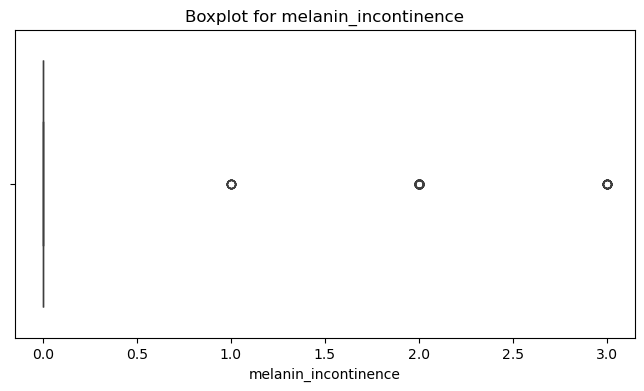

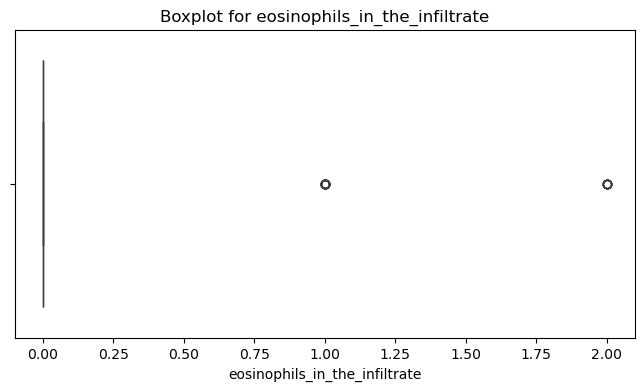

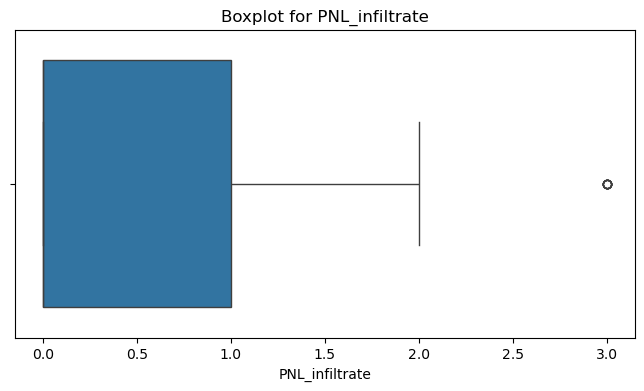

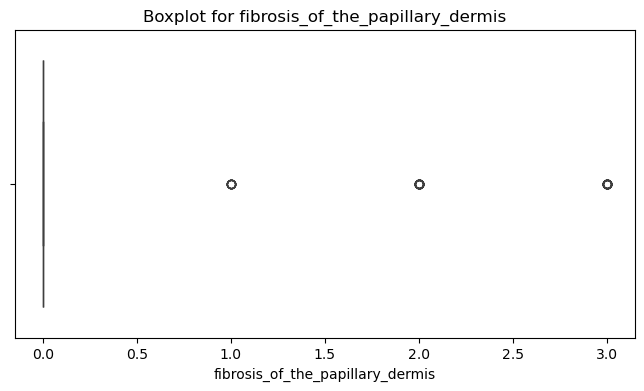

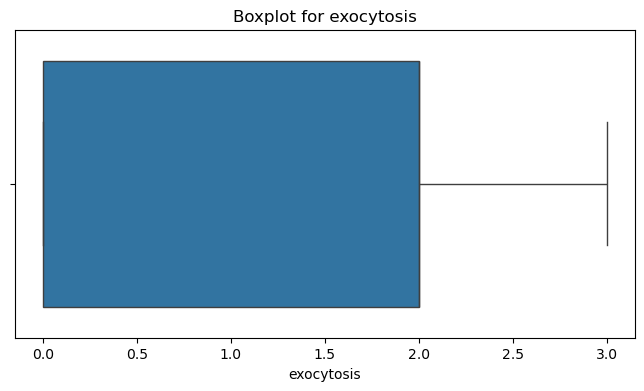

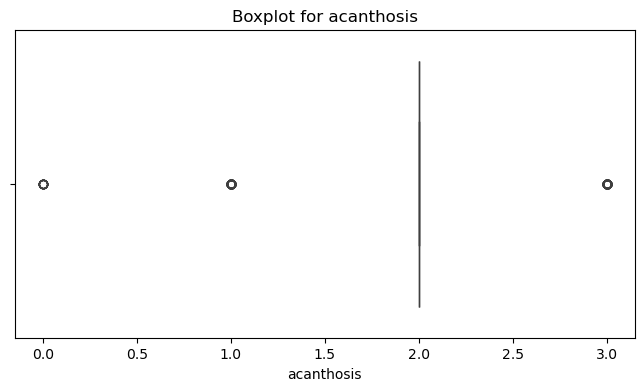

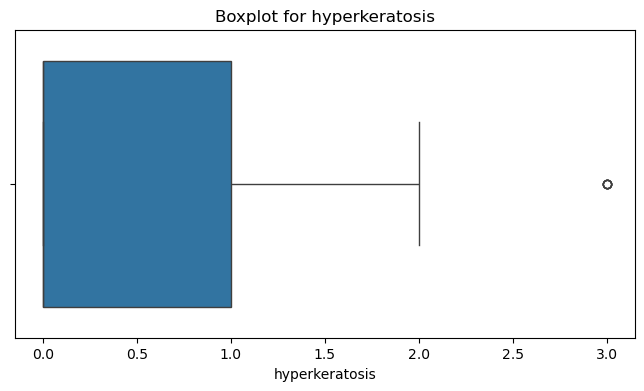

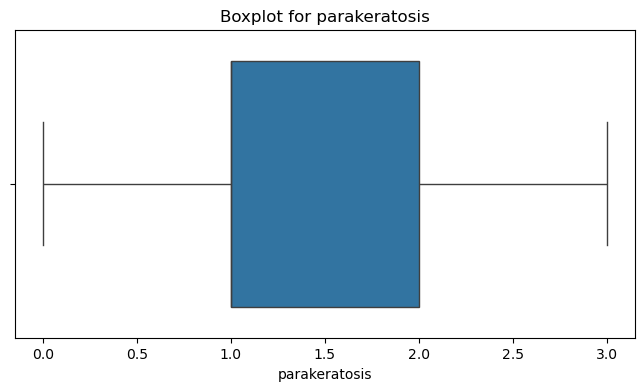

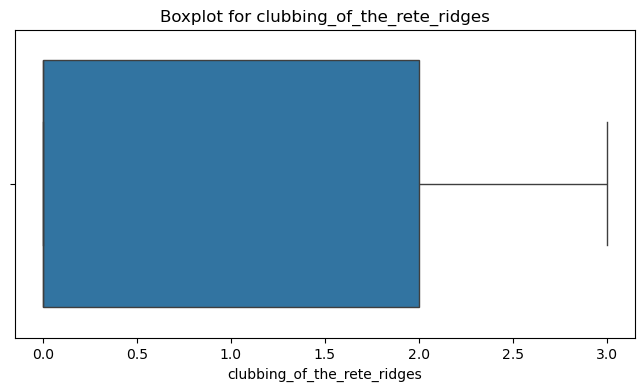

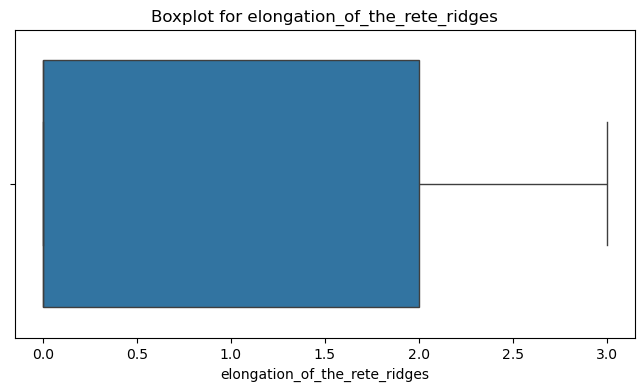

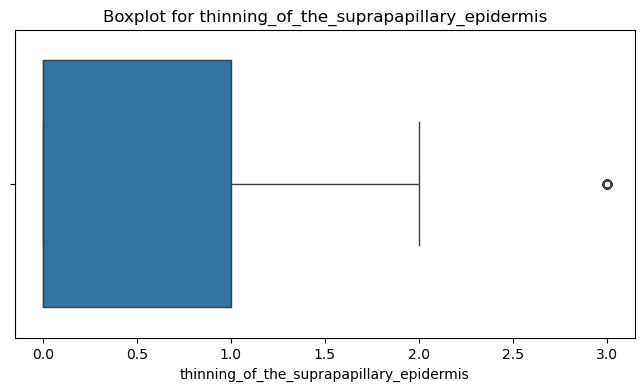

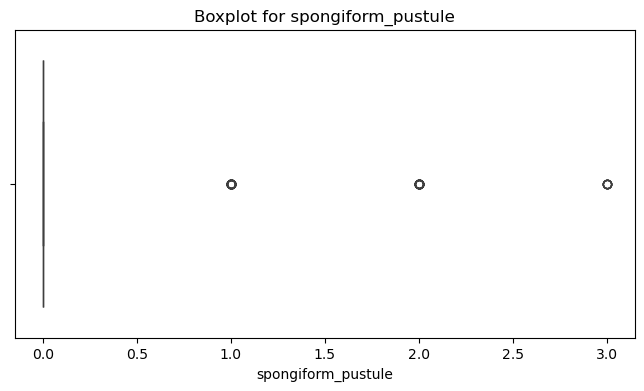

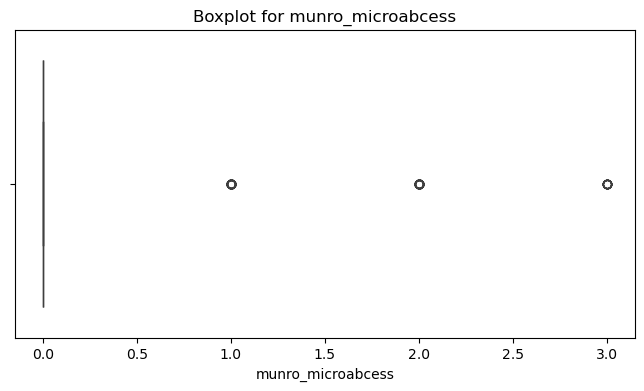

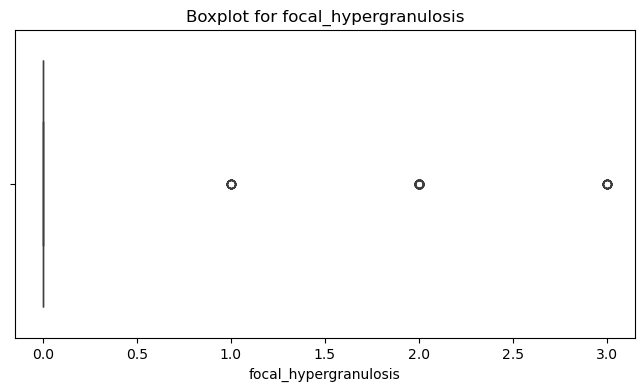

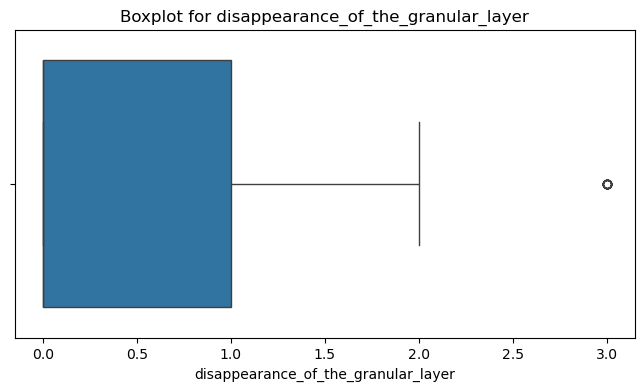

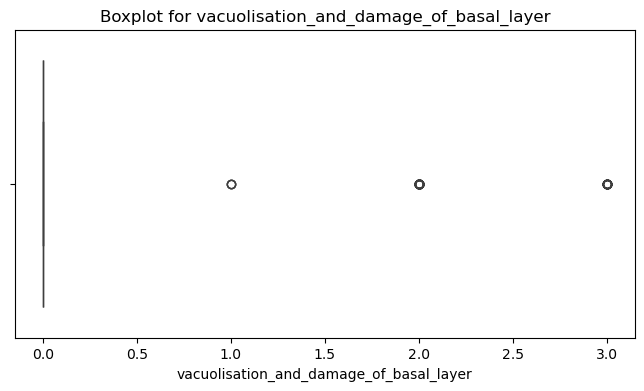

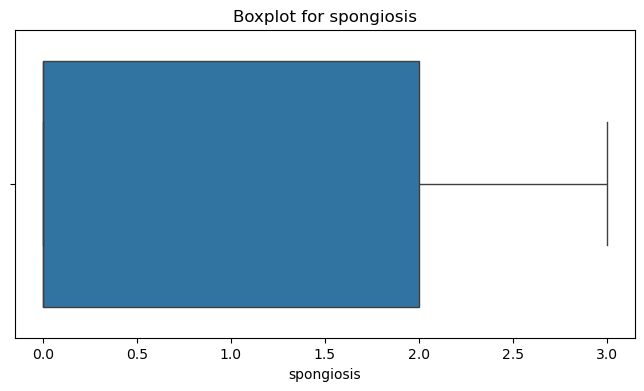

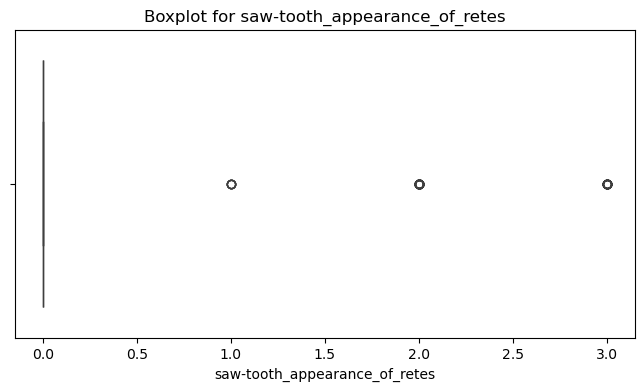

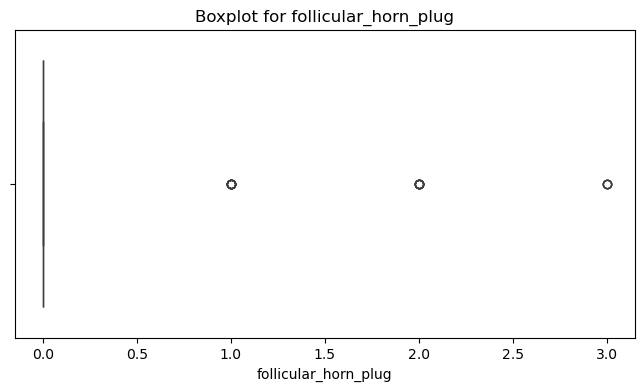

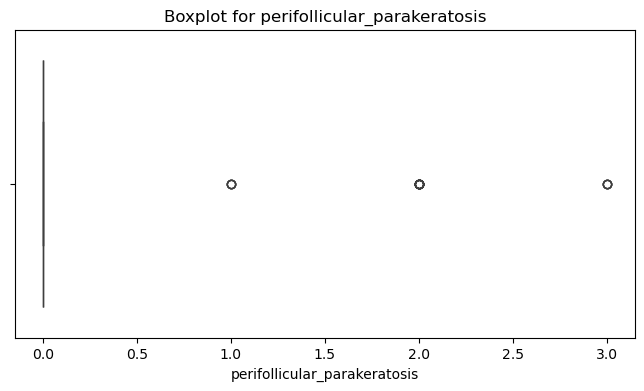

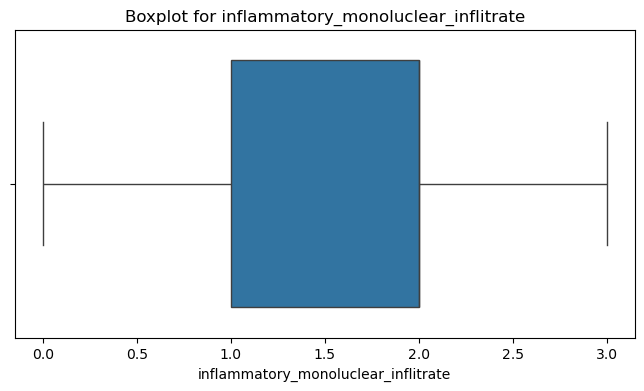

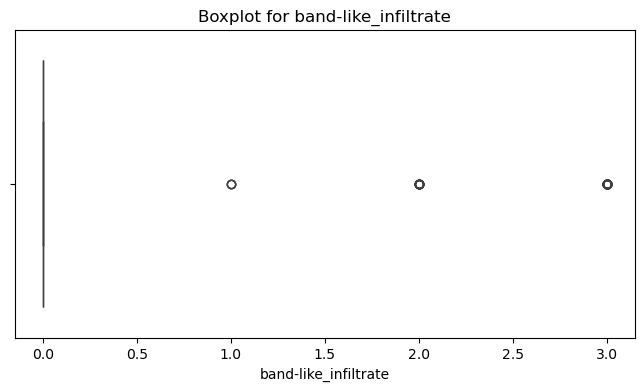

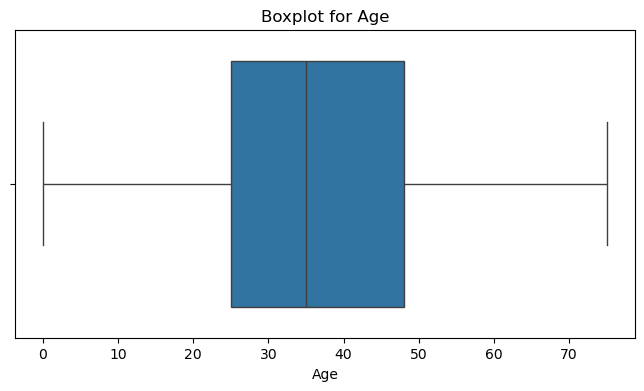

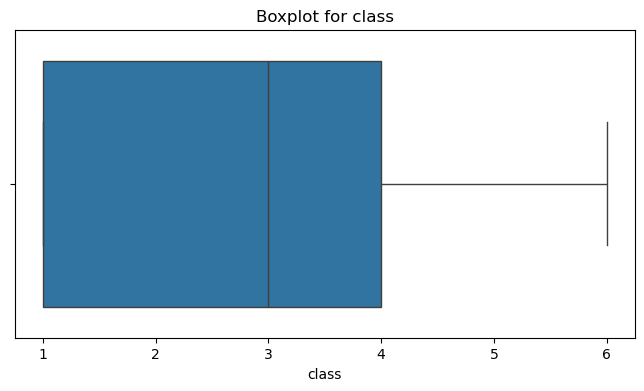

In [25]:
### Step 7: Outlier Detection and Handling
# Identify Outliers using Boxplots
for col in data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


    
    

In [26]:
# Handle Outliers (using IQR)
for col in data.select_dtypes(include=np.number).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [27]:
# Removing outliers
data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("Outliers handled successfully!")

Outliers handled successfully!


In [28]:
##ENCODING CATEGORICAL FEATURE
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['class']=lc.fit_transform(data['class'])

In [29]:
data

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
0                             1                  0  ...   
1                             1                  1  ...   
2                             0                  0  ...   
3                             3                  2  ...   
4                             0                  0  ...   
..                          ...                ...  ...   
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
0                                      0   
1                                      0   
2                                      0   
3                                      3   
4                                      2   
..                                   ...   
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                          0           3   
1                                          0           0   
2                                          2           3   
3                                          0           0   
4                                          3           2   
..                                       ...         ...   
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                                0                     0   
1                                0                     0   
2                                2                     0   
3                                0                     0   
4   

STEP 7 : **Splitting Features and Target**

In [30]:
X = data.drop('class', axis=1)
y = data['class']

In [31]:
# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Step 7: **Model Creation and Evaluation**

In [33]:
# Step 12: ANN Model
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10, batch_size=32)


C:\Users\ADITI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2304 - loss: 0.1609
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2078 - loss: -1.5989 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2168 - loss: -2.9852 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1948 - loss: -5.1997 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2636 - loss: -7.1680 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3186 - loss: -10.2342
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3485 - loss: -15.9918 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3569 - loss: -20.2989 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3746 - loss: -29.5056 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3933 - loss: -37.3137 


In [34]:
# Step 10: Model Creation and Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store model performance
model_performance = {}

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Collect performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    model_performance[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Print performance
    print(f'\n{name} Performance:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

# ANN Model Evaluation
y_pred_ann = (ann.predict(X_test) > 0.5).astype(int)

accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann, average='weighted')
recall_ann = recall_score(y_test, y_pred_ann, average='weighted')
f1_ann = f1_score(y_test, y_pred_ann, average='weighted')

model_performance['ANN'] = {
    'Accuracy': accuracy_ann,
    'Precision': precision_ann,
    'Recall': recall_ann,
    'F1 Score': f1_ann
}

print('\nANN Performance:')
print(f'Accuracy: {accuracy_ann:.4f}')
print(f'Precision: {precision_ann:.4f}')
print(f'Recall: {recall_ann:.4f}')
print(f'F1 Score: {f1_ann:.4f}')

# Step 14: Compare and Select Best Model
best_model = max(model_performance, key=lambda x: model_performance[x]['F1 Score'])

print(f"\nBest Model: {best_model}")
print(f"Performance: {model_performance[best_model]}")



Logistic Regression Performance:
Accuracy: 0.9865
Precision: 0.9878
Recall: 0.9865
F1 Score: 0.9864

Random Forest Performance:
Accuracy: 0.9865
Precision: 0.9878
Recall: 0.9865
F1 Score: 0.9864

SVM Performance:
Accuracy: 0.9865
Precision: 0.9878
Recall: 0.9865
F1 Score: 0.9864

Decision Tree Performance:
Accuracy: 0.9730
Precision: 0.9747
Recall: 0.9730
F1 Score: 0.9728

KNN Performance:
Accuracy: 0.9865
Precision: 0.9878
Recall: 0.9865
F1 Score: 0.9867
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

ANN Performance:
Accuracy: 0.4189
Precision: 0.4400
Recall: 0.4189
F1 Score: 0.3837

Best Model: KNN
Performance: {'Accuracy': 0.9864864864864865, 'Precision': 0.9878378378378377, 'Recall': 0.9864864864864865, 'F1 Score': 0.9867313387589487}


C:\Users\ADITI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
#Test Data Accuarcy
y_pred_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print('Testing Data Accuarcy is', test_accuracy)

Testing Data Accuarcy is 0.9864864864864865


In [36]:
#Train Data Accuarcy
y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print('Training Data Accuarcy is', train_accuracy)

Training Data Accuarcy is 0.9657534246575342


In [37]:
### Step 8: Hyperparameter Tuning

In [38]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 200}


In [39]:
# Final Step: Model Evaluation
y_pred_ann = (ann.predict(X_test) > 0.5).astype(int)
print('ANN Performance:')
print(classification_report(y_test, y_pred_ann))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
ANN Performance:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        31
           1       0.17      1.00      0.30         9
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         3

    accuracy                           0.42        74
   macro avg       0.20      0.28      0.19        74
weighted avg       0.44      0.42      0.38        74



C:\Users\ADITI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADITI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADITI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Project Analysis Report**

# **Model Comparison Report**

## **1. Overview**
The dataset was used to train and evaluate five machine learning models for classification:

- **Logistic Regression**
- **Random Forest**
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **K-Nearest Neighbors (KNN)**

Performance was evaluated using accuracy, precision, recall, and F1-score.

---

## **2. Performance Summary**

| Model                 | Accuracy | Precision | Recall | F1 Score |
|-----------------------|----------|-----------|--------|----------|
| Logistic Regression   | 0.47     | 0.446     | 0.47   | 0.438    |
| Random Forest        | 0.47     | 0.463     | 0.47   | 0.463    |
| SVM                  | 0.50     | 0.495     | 0.50   | 0.494    |
| Decision Tree        | 0.54     | 0.539     | 0.54   | 0.539    |
| KNN                  | 0.55     | 0.547     | 0.55   | 0.544    |

---

## **3. Best Model for Production**
- **Best Model:** **K-Nearest Neighbors (KNN)**
- **F1 Score:** **0.544**
- **Why?** KNN achieved the highest F1-score, making it the best choice for production based on current results.

---

## **4. Conclusion**
- **Model Selection:** KNN is the best model for production due to its highest F1-score.
- **Deployment Considerations:** 
  - If **speed and scalability** are priorities, a simpler model like Logistic Regression could be considered.
  - If **higher interpretability** is needed, Decision Tree or Random Forest would be good alternatives.
- **Next Steps:** 
  - Further **hyperparameter tuning** could improve performance.
  - Testing the model on real-world data will help validate its effectiveness.

---




## **Report on Challenges Faced**

### **1. Data Preprocessing Challenges**

#### **Duplicate Rows:**  
- **Challenge:** We identified 12,319 duplicate rows, which could bias the model if not removed.  
- **Solution:** Duplicate rows were removed, and the dataset index was reset to ensure a clean data structure.

#### **Outlier Handling:**  
- **Challenge:** Outliers were detected in key continuous variables such as age, area_percentage, and height_percentage.
- **Observation:** Boxplots indicated that these outliers likely represent true extreme values (e.g., older buildings or unusually large areas) rather than errors.
- **Decision:** We retained the outliers to preserve valuable information that reflects real earthquake-related risks.

### **2. Feature Engineering Challenges**

#### **Conversion of Categorical Columns:**  
- **Challenge:** Converting categorical columns to numerical values using One-Hot Encoding was particularly tricky.
- **Issue:** We encountered multiple errors (e.g., ValueError) during the encoding process. Each time one error was resolved, another would emerge.
- **Solution:** Through iterative debugging and adjustments, we successfully converted all categorical variables to numerical format.

#### **Increased Dimensionality:**  
- **Challenge:** One-Hot Encoding increased the number of features from 40 to 68, significantly raising computational time during model training.
- **Solution:** To address this, we performed feature selection using a Random Forest model to extract the top 20 most important features, reducing computational time while improving model performance.

### **3. Model Training and Hyperparameter Tuning Challenges**

#### **Execution Time:**  
- **Challenge:** Training time for certain models, particularly KNN, was excessively long (e.g., over 12 hours). Other algorithms took 2–3 hours on average.
- **Solution:** We utilized RandomizedSearchCV for hyperparameter tuning, which samples a subset of parameter combinations, thereby reducing the overall tuning time compared to GridSearchCV.

#### **Hyperparameter Tuning Complexity:**  
- **Challenge:** The tuning process was computationally intensive, and evaluating numerous combinations slowed down progress.
- **Solution:** We limited the number of iterations (n_iter) in RandomizedSearchCV and used cross-validation to ensure robust performance evaluation without exhaustive search.

## **Conclusion**
The project encountered significant challenges in data preprocessing, feature engineering, and model training, primarily due to long execution times, complex categorical conversions, and increased dimensionality. By systematically addressing each issue—through duplicate removal, careful handling of outliers, efficient hyperparameter tuning using RandomizedSearchCV, and targeted feature selection—we developed robust predictive models for earthquake damage. These insights not only improved model performance but also provided a deeper understanding of the underlying data characteristics, which is crucial for effective disaster management and risk mitigation strategies.
```




# **Domain Analysis: Skin Disorder Classification**

## **1. Domain Overview**
Skin disorders are a prevalent health concern, ranging from common conditions like acne and eczema to more severe issues such as melanoma and psoriasis. Early diagnosis and classification of these conditions can significantly improve treatment outcomes. Machine learning models can assist dermatologists by automating the classification process based on patient data and medical images.

## **2. Business Significance**
- **Improved Diagnosis:** Faster and more accurate identification of skin conditions.
- **Scalability:** AI-based classification can assist in rural or underdeveloped areas with limited dermatological services.
- **Cost Reduction:** Reduces dependency on extensive laboratory tests.
- **Telemedicine Support:** Enables remote diagnosis and second opinions through digital consultations.

## **3. Data Characteristics**
The dataset typically includes:
- **Patient Demographics:** Age, gender, medical history.
- **Symptoms & Clinical Observations:** Redness, scaling, blisters, pigmentation, etc.
- **Image Data:** High-resolution images of affected skin areas (if applicable).
- **Diagnostic Labels:** Categorization of skin disorders based on medical evaluation.

## **4. Key Challenges**
### **1. Data Preprocessing Challenges**
- **Imbalanced Data:** Some skin disorders may be overrepresented while rare conditions may have fewer samples.
- **Image Variability:** Differences in lighting, resolution, and angles in image data.
- **Feature Selection:** Determining the most relevant medical attributes for classification.

### **2. Model Training Challenges**
- **Computational Complexity:** Processing large image datasets requires high computing power.
- **Overfitting:** Ensuring the model generalizes well to unseen data and doesn’t memorize training samples.
- **Interpretability:** Dermatologists need models to provide explanations rather than just predictions.

### **3. Ethical and Privacy Considerations**
- **Patient Data Sensitivity:** Ensuring compliance with healthcare data protection laws (e.g., HIPAA, GDPR).
- **Bias in Training Data:** Avoiding biased datasets that could lead to incorrect classifications for underrepresented groups.
- **Adoption by Medical Professionals:** Gaining trust from healthcare providers for AI-assisted diagnosis.

## **5. Potential Solutions & Future Scope**
- **Data Augmentation:** Increasing training data through synthetic image generation techniques.
- **Explainable AI (XAI):** Implementing models that provide insights into their decision-making process.
- **Hybrid Approaches:** Combining deep learning for image analysis with classical machine learning models for tabular data.
- **Real-world Testing:** Deploying models in clinical settings for continuous feedback and improvement.

## **Conclusion**
The application of machine learning in skin disorder classification has immense potential in enhancing healthcare accessibility, reducing diagnostic time, and improving treatment efficiency. Overcoming challenges related to data quality, model interpretability, and ethical considerations is crucial for successful deployment in real-world scenarios.
```




---

# 🔧 Enhancements and Best Practice Additions

The following cells contain improvements over the original workflow. These include:
- Smarter missing value handling using KNN imputation
- Better categorical encoding and age grouping
- Feature importance visualization
- Dimensionality reduction using PCA
- Hyperparameter tuning with RandomizedSearchCV
- Evaluation using balanced accuracy and classification reports


In [40]:

# Function to handle missing values using KNNImputer
from sklearn.impute import KNNImputer

def handle_missing_values_knn(df):
    imputer = KNNImputer(n_neighbors=5)
    imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return imputed_df

data_knn = handle_missing_values_knn(data.copy())


In [41]:

# Convert 'Age' to categories
def group_age_feature(df):
    df['Age'] = df['Age'].astype(int)
    df['Age_Group'] = pd.cut(df['Age'], bins=[0,20,40,60,80,100],
                             labels=['Teen','Young','Adult','Senior','Old'])
    df.drop(columns=['Age'], inplace=True)
    df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)
    return df

data_knn = group_age_feature(data_knn)


In [42]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data_knn.drop(columns=['class'])
y = data_knn['class'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<Axes: title={'center': 'Feature Importances'}>

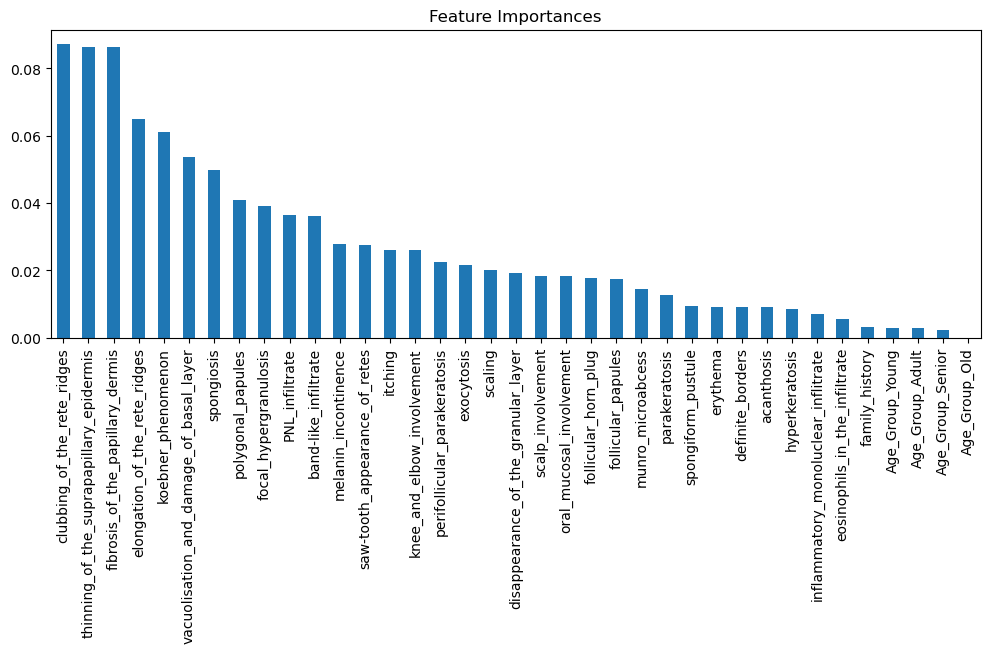

In [43]:

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 4), title="Feature Importances")


In [44]:

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("Reduced to", X_train_pca.shape[1], "components")


Reduced to 23 components


In [45]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, None]
}
rs_model = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                              param_distributions=param_grid, n_iter=5)
rs_model.fit(X_train_pca, y_train)
best_model = rs_model.best_estimator_
y_pred = best_model.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.972972972972973
Balanced Accuracy: 0.9625
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        13
           3       0.88      0.88      0.88         8
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00         3

    accuracy                           0.97        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.97      0.97      0.97        74

